In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

mnist = datasets.load_digits()

In [2]:
X, y = mnist['data'], mnist['target']

In [3]:
print(X.shape, y.shape)

(1797, 64) (1797,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


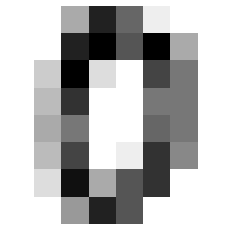

In [4]:
# first_image = X[0]
# first_image = first_image.reshape(8,8)

# plt.imshow(first_image, cmap=matplotlib.cm.binary, interpolation='nearest')
# plt.axis('off')
# plt.show()

# Data Splitting

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
shuffle_index = np.random.permutation(len(X_train))
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Dealing with only 5's

In [7]:
y_train_5 = (y_train == 5)
y_train_5

array([False, False, False, ..., False, False, False])

### SGD Classifier

In [8]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
sgd_clf.predict([X_train[2]])

array([False])

In [10]:
# skfolds = StratifiedKFold(n_splits=3, random_state=42)

In [11]:
# for train_index, test_index in skfolds.split(X_train, y_train_5):
#     clone_clf = clone(sgd_clf)
#     X_train_folds = X_train[train_index]
#     y_train_folds = (y_train_5[train_index])
#     X_test_fold = X_train[test_index]
#     y_test_fold = (y_train_5[test_index])
#     clone_clf.fit(X_train_folds, y_train_folds)
#     y_pred = clone_clf.predict(X_test_fold)
#     n_correct = sum(y_pred == y_test_fold)
#     print(n_correct / len(y_pred))

0.9812108559498957
0.9770354906054279
0.9916492693110647


In [12]:
# Or.

In [13]:
sgd_clf_2 = SGDClassifier(random_state=42)

In [14]:
scores = cross_val_score(sgd_clf_2, X_train, y_train_5, cv=3, scoring='accuracy')
scores

array([0.98121086, 0.97703549, 0.99164927])

In [15]:
# The accuracies seem to be really high. Let's check to make sure.

In [16]:
sgd_clf_3 = SGDClassifier(random_state=42)

In [17]:
y_train_pred = cross_val_predict(sgd_clf_3, X_train, y_train_5, cv=3)

In [18]:
conf_matrix = confusion_matrix(y_train_5, y_train_pred)
conf_matrix

array([[1284,   12],
       [  12,  129]])

In [19]:
# each row is a class and each column is a predicted class
# 1st row is non-5's and 2nd row is 5's

In [20]:
pres_score = precision_score(y_train_5, y_train_pred) # TP / TP + FP - this is the % of 5's it predicted correctly
rec_score = recall_score(y_train_5, y_train_pred) # TP / TP + FN - predicts this percent of all the 5's
print(f'precision score: {pres_score}')
print(f'recall score: {rec_score}')

precision score: 0.9148936170212766
recall score: 0.9148936170212766


In [21]:
f1_score = f1_score(y_train_5, y_train_pred) # TP / ( TP + ( (FN + FP) / 2 ) )
print(f'f1 score: {f1_score}') # -> review f1 again

f1 score: 0.9148936170212766


In [22]:
# Precision and recall are tradeoffs, can't have both - either choose to get more false positives or more false negatives.

In [23]:
sgd_4 = SGDClassifier(random_state=42)

In [24]:
y_scores = cross_val_predict(sgd_4, X_train, y_train_5, cv=3, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [25]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[: -1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[: -1], 'g--', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='lower left')
    plt.ylim([-0.5,1.25])

[]

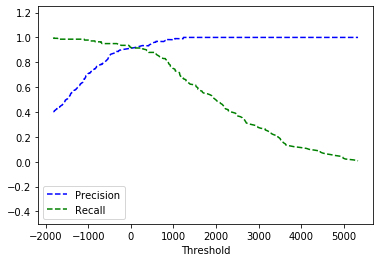

In [26]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot()

Text(0.5, 1.0, 'Precision vs Recall')

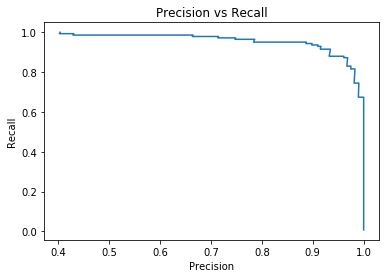

In [27]:
plt.plot(precisions[:-1], recalls[: -1])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision vs Recall')

In [28]:
def get_scores(threshold):
    y_train_prec = (y_scores > threshold)
    print(f'Threshold: {threshold}')
    print(f'Precision: {precision_score(y_train_5, y_train_prec)}')
    print(f'Recall: {recall_score(y_train_5, y_train_prec)}')

In [29]:
get_scores(0)

Threshold: 0
Precision: 0.9148936170212766
Recall: 0.9148936170212766


In [30]:
get_scores(500)

Threshold: 500
Precision: 0.9612403100775194
Recall: 0.8794326241134752


In [31]:
get_scores(1000)

Threshold: 1000
Precision: 0.9813084112149533
Recall: 0.7446808510638298


In [32]:
get_scores(-500)

Threshold: -500
Precision: 0.8535031847133758
Recall: 0.950354609929078


In [33]:
get_scores(-1000)

Threshold: -1000
Precision: 0.711340206185567
Recall: 0.9787234042553191


In [34]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [35]:
def plot_roc_curve(fpr, tpr, label=None): # good classifier tries to stay as far in the top left as possible
    plt.plot(fpr, tpr, linewidth=1, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

0.9955290692583837


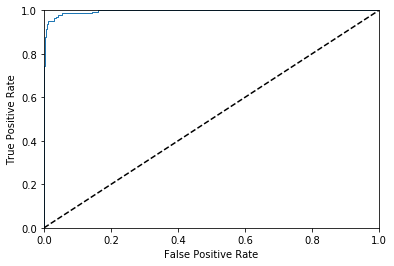

In [36]:
print(roc_auc_score(y_train_5, y_scores))
plot_roc_curve(fpr, tpr)
plt.show()

In [37]:
# Since the ROC curve is so similar to the precision/recall (or PR)
# curve, you may wonder how to decide which one to use. As a rule
# of thumb, you should prefer the PR curve whenever the positive
# class is rare or when you care more about the false positives than
# the false negatives, and the ROC curve otherwise. For example,
# looking at the previous ROC curve (and the ROC AUC score), you
# may think that the classifier is really good. But this is mostly
# because there are few positives (5s) compared to the negatives
# (non-5s). In contrast, the PR curve makes it clear that the classifier
# has room for improvement (the curve could be closer to the top-
# right corner).

### Random Forest Classifier

In [38]:
forest_clf = RandomForestClassifier(random_state=42)

In [39]:
forest_y_pred = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba') # returns a row for each prediction and a column for each possible prediction and contains the percent that that row could belong to each of the possible prediction columns

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
forest_y_pred

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [41]:
y_scores_forest = forest_y_pred[:, 1]

In [42]:
fpr_forest, tpr_forest, thresholds = roc_curve(y_train_5, y_scores_forest)

[]

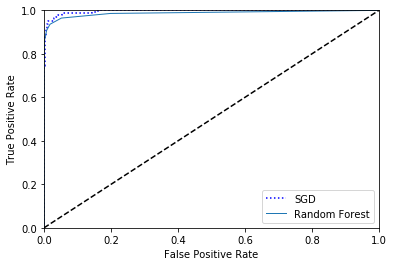

In [43]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.plot()

In [44]:
print(roc_auc_score(y_train_5, y_scores_forest))

0.9872548375798966


In [45]:
# try to get precision and recall scores for Random Forest Classifier

In [53]:
# print(f'Recall: {recall_score(y_train_5, y_scores_forest)}')

In [54]:
# SGD seems to be slightly better than Rnadom Forest

# Dealing with all Labels

### SGD Classifier

In [55]:
all_sgd = SGDClassifier(random_state=42)

In [56]:
all_sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [57]:
all_sgd.predict([X_train[3]])

array([3])

In [58]:
scores = all_sgd.decision_function([X_train[3]])

In [59]:
np.argmax(scores)

3

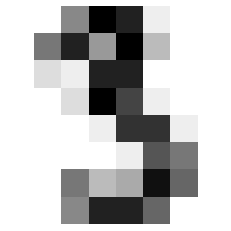

In [60]:
first_image = X[3]
first_image = first_image.reshape(8,8)

plt.imshow(first_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [61]:
print(y_train[3])

3


In [69]:
sgd_scores = cross_val_score(all_sgd, X_train, y_train, cv=3, scoring='accuracy')
sgd_scores

array([0.95850622, 0.95625   , 0.96631579])

### Random Forest Classifier

In [62]:
forest_clf = RandomForestClassifier(random_state=42)

In [63]:
forest_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [65]:
print(forest_clf.predict_proba([X_train[3]])) # most likely a 3 by percents
print(forest_clf.predict([X_train[3]]))

[[0.  0.1 0.  0.8 0.  0.1 0.  0.  0.  0. ]]
[3]


In [67]:
# Running with cross_val_score()
scores = cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy')

In [68]:
scores

array([0.93983402, 0.9125    , 0.94105263])

# Fine Tuning

In [70]:
final_sgd = SGDClassifier(random_state=42)
y_train_pred = cross_val_predict(final_sgd, X_train, y_train, cv=3)

In [71]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
conf_matrix

array([[146,   0,   0,   0,   2,   1,   0,   0,   0,   0],
       [  0, 148,   0,   1,   0,   0,   0,   0,   2,   1],
       [  0,   2, 132,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 132,   0,   0,   0,   2,   2,   4],
       [  0,   2,   0,   0, 137,   0,   0,   0,   2,   1],
       [  0,   0,   0,   1,   1, 134,   1,   0,   0,   4],
       [  0,   1,   0,   0,   1,   2, 143,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 135,   1,   3],
       [  0,   5,   0,   1,   0,   3,   0,   0, 133,   1],
       [  0,   1,   0,   2,   2,   0,   0,   0,   3, 140]])

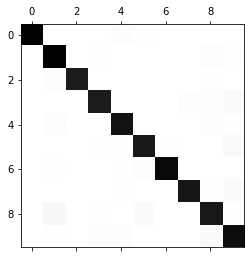

In [77]:
plt.matshow(conf_matrix, cmap=plt.cm.binary)
plt.show()

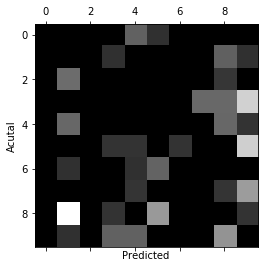

In [81]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix / row_sums

np.fill_diagonal(norm_conf_matrix, 0)
plt.matshow(norm_conf_matrix, cmap=plt.cm.gray)
plt.xlabel('Predicted')
plt.ylabel('Acutal')
plt.show()

In [ ]:
# brightness on columns 8 and 9 show images get misclassified for those numbers
# SGDClassifier assigns a weight to each pixel and then adds up the weights and assigns a number label to that specific training example